#Modification of the content of a telemac file

This script allows to make alteration to a telemac file such as:
  * [Removing results for a list of variables/times](#Removing-data)
  * [Changing endianess of the file](#Switching-endianess)
  * Switching between lat/long, spherical, UTM coordinates (options --sph2ll, --ll2sph, --ll2utm, --utm2ll)
  * [Modifying variable result (Addition, multiplication and both)](#Modification-of-result-value)
  * [Switch between single/double precision](#Switching-real-precision)
  * [Modifying the title of the file](#Modifying-the-title)
  * [Resetting time to zero](#Resetting-time-to-zero)
  * [Changing the date](#Changing-the-date)
  * [Modification of result values](#Modification-of-result-value)
  * [Modifying the coordinates (Addition, multiplication and both)](#Modification-of-coordinates) 
  * [Rotation of the mesh](#Rotation-of-the-mesh)
  * [Projection on new system](#Projection-on-new-system)
  * [Changing origin of coordinates](#Changing-origin-of-coordinates)
  


In [1]:
!run_telfile.py alter -h



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



usage: run_telfile.py alter [-h] [-b BND_FILE] [--force] [--float] [--endian]
                            [--title TITLE] [--datetime DATETIME]
                            [--vars XVARS] [--rename RENAME_VAR]
                            [--var? MODIF_VAR] [--var+? ADD_VAR]
                            [--var*? MUL_VAR] [-t TIMES [TIMES ...]]
                            [-f TFROM] [-s TEND] [-d TSTEP] [--reset-time]
                            [--T+? ADD_TIME] [--T*? MUL_TIME]
                            [--sph2ll SPH2LL SPH2LL] [--ll2sph LL2SPH LL2SPH]
                            [--ll2utm LL2UTM] [--utm2ll UTM2LL] [--X+? ADD_X]
                            [--X*? MUL_X] [--Y+? ADD_Y] [--Y*? MUL_Y]
                            [--orig ORIG ORIG] [--rotate ROTATE]
                            [--rotation-point ROT_PT ROT_PT] [--center]
                            [--proj PROJ] [--disable-auto-precision]
                            input_file output_file

positional arguments:
  input_file  


The option -r/--replace will do the modification directly in the input file so no need for the second argument

## Removing data


### Removing even time steps


In [2]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/python3/pretel

!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_chop.slf -f 1 -s -1 -d 2 --force

!run_telfile.py scan r2d_gouttedo_chop.slf > modif.log

import difflib
from pathlib import Path

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> New range of records: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
 ~> New range of times: [0.2        0.60000002 1.         1.39999998 1.79999995 2.20000005
 2.5999999  3.         3.4000001  3.79999995]


My work is done




---
+++
@@ -728,2 +728,2 @@
-2
-1
+1
+0
@@ -750 +750,17 @@
-0
+2
+0
+0
+0
+0
+0
+0
+0
+2
+9
+8
+0
+2
+3
+2
+2
+4
@@ -752,0 +769,16 @@
+3
+.
+7
+9
+9
+9
+9
+9
+9
+5
+2
+3
+1
+6
+2
+8
@@ -754,2 +785,0 @@
-.
-0


### Keeping only the last time step

In [3]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_last_time_step.slf -f -1 --force

!run_telfile.py scan r2d_gouttedo_last_time_step.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> New range of records: [20]
 ~> New range of times: [4.]


My work is done




---
+++
@@ -728 +727,0 @@
-2
@@ -748 +747 @@
-0
+4


### Selecting times to keep

In [4]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_select_time.slf --force --times 0.2 3.0 4.0

!run_telfile.py scan r2d_gouttedo_select_time.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> New range of records: [1, 15, 20]
 ~> New range of times: [0.2 3.  4. ]


My work is done




---
+++
@@ -728,2 +728 @@
-2
-1
+3
@@ -750 +749,17 @@
-0
+2
+0
+0
+0
+0
+0
+0
+0
+2
+9
+8
+0
+2
+3
+2
+2
+4


### Keeping only one variable

In [5]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_no_water_depth.slf --vars "WATER DEPTH" --force

!run_telfile.py scan r2d_gouttedo_no_water_depth.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> Modif in variables:
    Removing VELOCITY U M/S
    Removing VELOCITY V M/S
    Using WATER DEPTH M


My work is done




---
+++
@@ -783,79 +783 @@
-3
-
-
-
-
-
--
-
-N
-a
-m
-e
-:
-
-V
-E
-L
-O
-C
-I
-T
-Y
-
-U
-
-
-
-
-
-
-
-U
-n
-i
-t
-:
-
-M
-/
-S
-
-
-
-
-
--
-
-N
-a
-m
-e
-:
-
-V
-E
-L
-O
-C
-I
-T
-Y
-
-V
-
-
-
-
-
-
-
-U
-n
-i
-t
-:
-
-M
-/
-S
+1


## Switching endianess

In [6]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_endian.slf --endian --force

!run_telfile.py scan r2d_gouttedo_endian.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> Switching to LITTLE_ENDIAN




My work is done




---
+++
@@ -237 +237 @@
-B
+L
@@ -239 +239,4 @@
-G
+T
+T
+L
+E


## Modifying the title

In [7]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_float.slf --title="COCO L'ASTICOT" --force

!run_telfile.py scan r2d_gouttedo_float.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> New title: COCO L'ASTICOT


My work is done




---
+++
@@ -139,2 +139,5 @@
-T
-E
+C
+O
+C
+O
+
@@ -142,24 +145 @@
-E
-M
-A
-C
-
-2
-D
-
-:
-
-D
-R
-O
-P
-L
-E
-T
-
-I
-N
-
-A
-
-B
+'
@@ -167,0 +148 @@
+T
@@ -169 +150,3 @@
-N
+C
+O
+T


## Switching real precision

In [8]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_float.slf --float --force

!run_telfile.py scan r2d_gouttedo_float.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> Switching to double precision
 ~> Removing: r2d_gouttedo_float.slf




My work is done




---
+++
@@ -219,0 +220 @@
+D
@@ -263,4 +264,4 @@
-S
-i
-n
-g
+D
+o
+u
+b


## Resetting time to zero

In [9]:
!run_telfile.py scan r2d_gouttedo_part2.slf > init.log

!run_telfile.py alter r2d_gouttedo_part2.slf r2d_gouttedo_float.slf --reset-time --force

!run_telfile.py scan r2d_gouttedo_float.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> reseting time from 0: [0.         0.20000005 0.4000001  0.5999999  0.79999995 1.
 1.20000005 1.4000001  1.5999999  1.79999995 2.        ]
 ~> Removing: r2d_gouttedo_float.slf


My work is done




---
+++
@@ -748 +748 @@
-2
+0
@@ -753 +753 @@
-4
+2


## Changing the date

In [10]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_float.slf --datetime="2020-06-06 06:06:06" --force

!run_telfile.py scan r2d_gouttedo_float.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> New date: 2020-06-06 06:06:06
 ~> Removing: r2d_gouttedo_float.slf




My work is done




---
+++
@@ -181,6 +180,0 @@
-1
-9
-9
-7
--
-0
@@ -188 +182 @@
--
+0
@@ -190,10 +184,16 @@
-1
-
-1
-0
-:
-2
-1
-:
-3
-0
+0
+-
+0
+6
+-
+0
+6
+
+0
+6
+:
+0
+6
+:
+0
+6


## Modification of result value

We are going to do Z = 2*Z + 10
Also we will rename the variable WATER DEPTH by "WATER DEPTH2    ".

The new name must be 16 character long do not forget the spaces.

In [11]:
!run_telfile.py scan --data r2d_gouttedo.slf > init.log

# Modifcation of the values
!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_new_water_depth.slf --rename="WATER DEPTH=WATER DEPTH2" \
                     --var?="WATER DEPTH2" --var+? 10 --var*? 2 --force

!run_telfile.py scan --data r2d_gouttedo_new_water_depth.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

WATER DEPTH -> WATER DEPTH2
 ~> Renaming WATER DEPTH -> WATER DEPTH2
 ~> Modifying WATER DEPTH2 at 0.00s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 0.20s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 0.40s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 0.60s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 0.80s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 1.00s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 1.20s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 1.40s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 1.60s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 1.80s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 2.00s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 2.20s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 2.40s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 2.60s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 2.80s: 2.0*val+10.0
 ~> Modifying WATER DEPTH2 at 3.00s: 2.0*val+10.0
 ~> Modifying WATER D



My work is done




---


+++
@@ -886 +886 @@
-
+2
@@ -4320,1686 +4320,1699 @@
-
-
-
-
-
-+
->
-
-T
-i
-m
-e
-:
-
-0
-.
-0
-s
-
-m
-i
-n
-,
-
-m
-a
-x
-:
-
-
-[
-2
-.
-4
-0
-0
-0
-0
-0
-0
-9
-5
-3
-6
-7
-4
-3
-1
-6
-,
-
-4
-.
-7
-7
-3
-1
-5
-2
-8
-2
-8
-2
-1
-6
-5
-5
-3
-]
-
-
-
-
-
-+
->
-
-T
-i
-m
-e
-:
-
-0
-.
-2
-0
-0
-0
-0
-0
-0
-0
-2
-9
-8
-0
-2
-3
-2
-2
-4
-s
-
-m
-i
-n
-,
-
-m
-a
-x
-:
-
-
-[
-2
-.
-4
-0
-0
-0
-0
-0
-0
-9
-5
-3
-6
-7
-4
-3
-1
-6
-,
-
-3
-.
-4
-7
-8
-9
-3
-1
-4
-2
-7
-0
-0
-1
-9
-5
-3
-]
-
-
-
-
-
-+
->
-
-T
-i
-m
-e
-:
-
-0
-.
-4
-0
-0
-0
-0
-0
-0
-0
-5
-9
-6
-0
-4
-6
-4
-5
-s
-
-m
-i
-n
-,
-
-m
-a
-x
-:
-
-
-[
-2
-.
-4
-0
-0
-0
-0
-0
-0
-9
-5
-3
-6
-7
-4
-3
-1
-6
-,
-
-2
-.
-9
-7
-0
-1
-6
-6
-9
-2
-1
-6
-1
-5
-6
-0
-0
-6
-]
-
-
-
-
-
-+
->
-
-T
-i
-m
-e
-:
-
-0
-.
-6
-0
-0
-0
-0
-0
-0
-2
-3
-8
-4
-1
-8
-5
-7
-9
-s
-
-m
-i
-n
-,
-
-m
-a
-x
-:
-
-
-[
-1
-.
-9
-7
-6
-1
-0
-7
-2
-3
-9
-7
-2
-3
-2
-0
-5
-6
-,
-
-2
-.
-9
-0
-2
-6
-7
-6
-8
-2
-0
-7
-5
-5
-0
-0
-5
-]
-
-
-
-
-
-+
->
-
-T
-i
-

## Modification of coordinates

We are going to do the following modifications:
  * X = 10*X + 2
  * Y = 2*Y  + 5

In [12]:
!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_new_coord.slf --X*? 10 --X+? 2 --Y*? 2 --Y+? 5 --force

!run_telfile.py scan r2d_gouttedo_new_coord.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> modification of coord x: 10.0*x+2.0
 ~> modification of coord y: 2.0*y+5.0


Changing format to SERAFIND because segment are too small




My work is done




---
+++
@@ -219,0 +220 @@
+D
@@ -263,4 +264,4 @@
-S
-i
-n
-g
+D
+o
+u
+b
@@ -532 +533 @@
-0
+2
@@ -538,0 +540 @@
+3
@@ -540 +541,0 @@
-1
@@ -572 +573 @@
-0
+5
@@ -577,2 +578,2 @@
-2
-0
+4
+5
@@ -579,0 +581,4 @@
+2
+0
+0
+0
@@ -581,5 +586,6 @@
-0
-0
-0
-0
-6
+2
+2
+0
+7
+0
+3
@@ -587,6 +592,0 @@
-0
-3
-5
-1
-5
-6


## Rotation of the mesh

here we will do two ratations:
*  one of 90 degrees around its center.
*  one of 180 around the point 50, 50 (by default it will rotate around (0,0)).

In [13]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/malpasset

!run_telfile.py alter f2d_malpasset-prim.slf geo_malpasset-small-rotate.slf --rotate 90 --center --force
!run_telfile.py alter f2d_malpasset-prim.slf geo_malpasset-small-rotate2.slf --rotate 180 --rotation-point 2000 2000 --force



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> Rotation of 90.0 around (8613.299346923828,4590.6650390625)




My work is done






Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

 ~> Rotation of 180.0 around (2000.0,2000.0)




My work is done




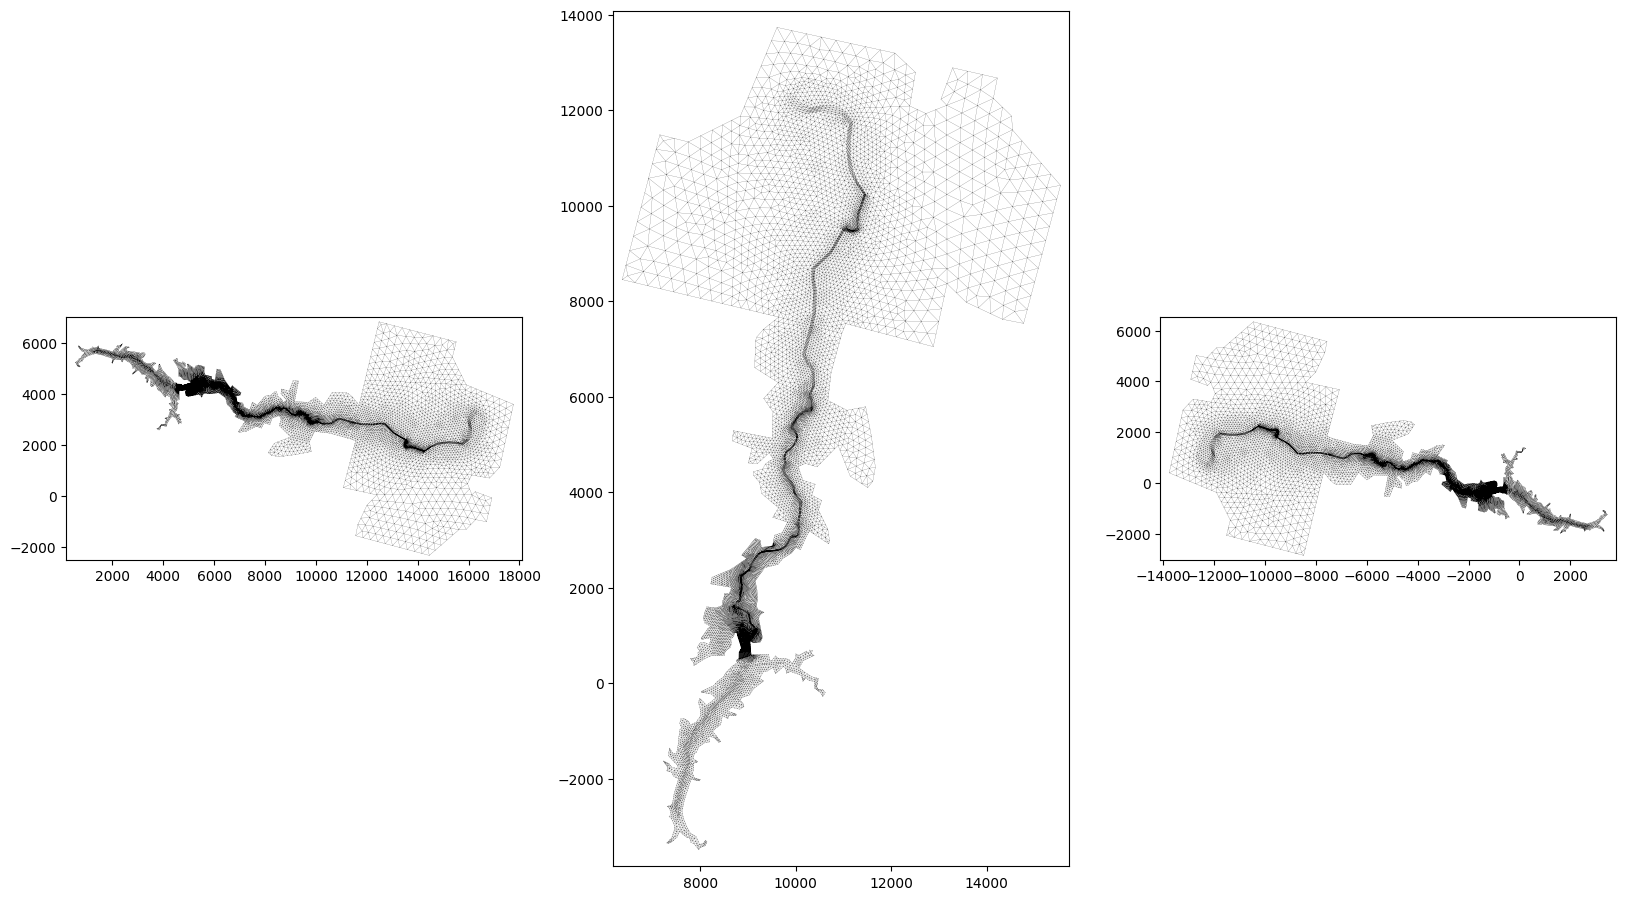

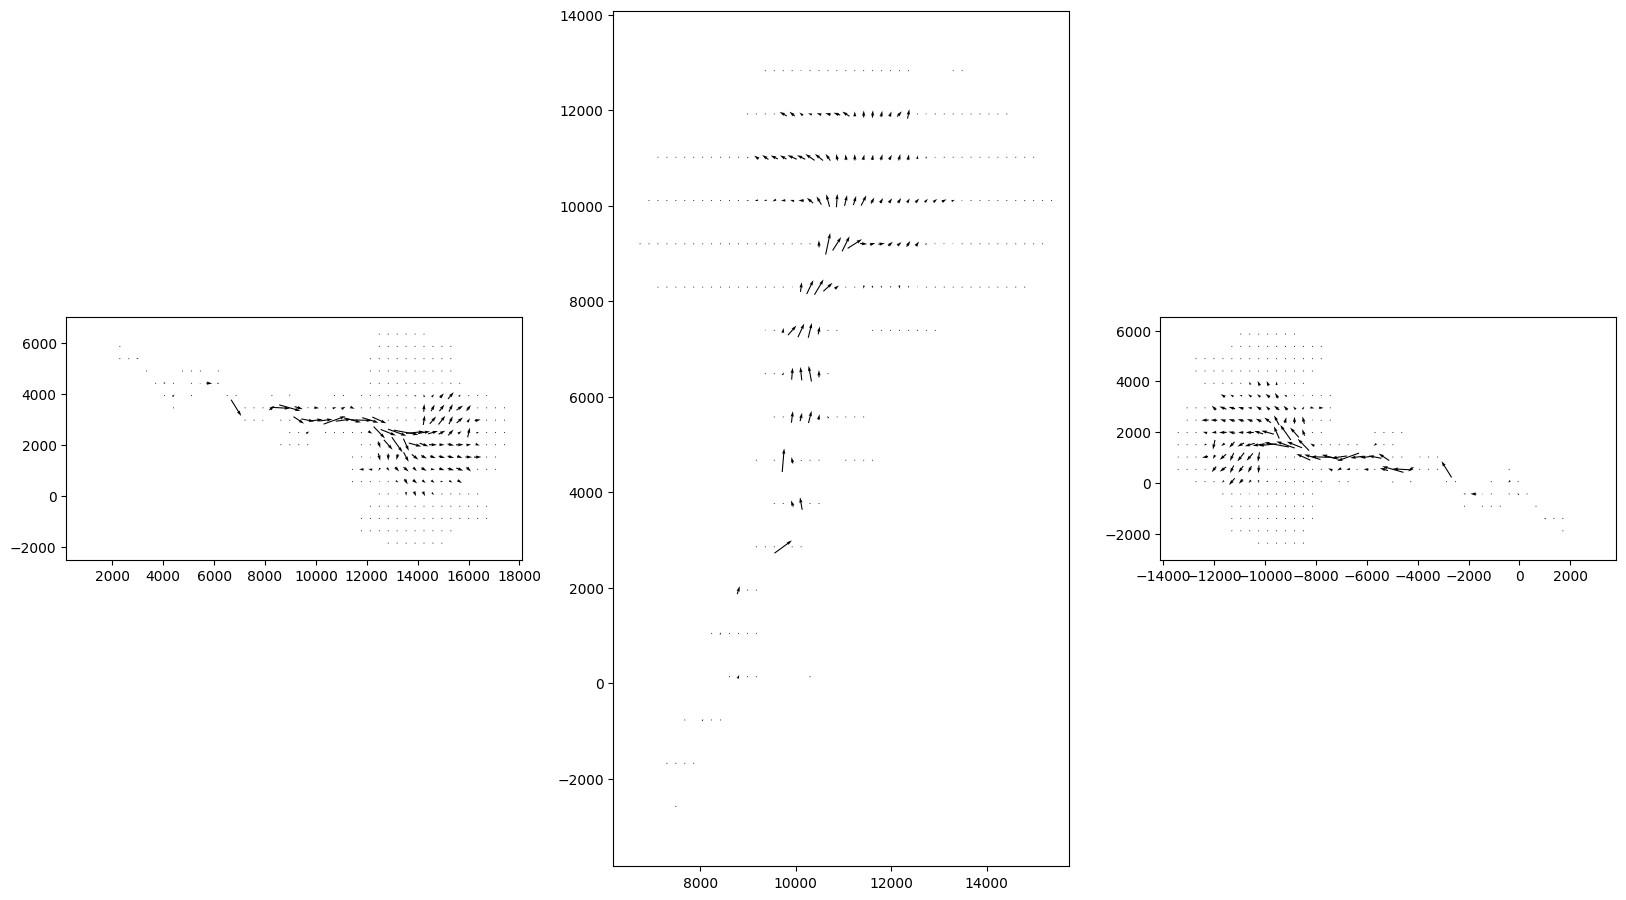

In [14]:
from postel.plot2d import plot2d_triangle_mesh, plot2d_vectors
from data_manip.extraction.telemac_file import TelemacFile
from os import path, environ
import matplotlib.pyplot as plt

pdir = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'malpasset')

ori_file = path.join(pdir, 'f2d_malpasset-prim.slf')
res_file = path.join(pdir, 'geo_malpasset-small-rotate.slf')
res2_file = path.join(pdir, 'geo_malpasset-small-rotate2.slf')


ori = TelemacFile(ori_file)
res = TelemacFile(res_file)
res2 = TelemacFile(res2_file)


fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')


# Plot mesh
plot2d_triangle_mesh(ax[0], ori.tri)
plot2d_triangle_mesh(ax[1], res.tri)
plot2d_triangle_mesh(ax[2], res2.tri)

plt.show()
plt.close(fig)

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')
ax[2].set_aspect('equal')

Ux_ori = ori.get_data_value('VELOCITY U', -1)
Uy_ori = ori.get_data_value('VELOCITY V', -1)

Ux_res = res.get_data_value('VELOCITY U', -1)
Uy_res = res.get_data_value('VELOCITY V', -1)

Ux_res2 = res2.get_data_value('VELOCITY U', -1)
Uy_res2 = res2.get_data_value('VELOCITY V', -1)


# Plotting vectors 
plot2d_vectors(fig, ax[0], ori.tri, Ux_ori, Uy_ori, data_name='velocity',\
               normalize=False,
               scale=100,
               grid_resolution=[50, 20],
               color='k', pivot='mid')
#               width=0.001, headwidth=3., headlength=4.)
plot2d_vectors(fig, ax[1], res.tri, Ux_res, Uy_res, data_name='velocity',\
               normalize=False,
               scale=100,
               grid_resolution=[50, 20],
               color='k', pivot='mid')#,
#               width=0.001, headwidth=3., headlength=4.)

plot2d_vectors(fig, ax[2], res2.tri, Ux_res2, Uy_res2, data_name='velocity',\
               normalize=False,
               scale=100,
               grid_resolution=[50, 20],
               color='k', pivot='mid')#,
#               width=0.002, headwidth=3., headlength=4.)


plt.show()
plt.close(fig)



ori.close()
res.close()
res2.close()

## Projection on new system

Here we will project the mesh that is in Lambert1Nord into Lambert93.

In [15]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/telemac2d/tide

!run_telfile.py alter f2d_tide-jmj_type.slf  f2d_tide-jmj_type-lamb93.slf --proj="EPSG:27561/EPSG:2154" --force



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



 ~> Converting from NTF (Paris) / Lambert Nord France to RGF93 v1 / Lambert-93




My work is done




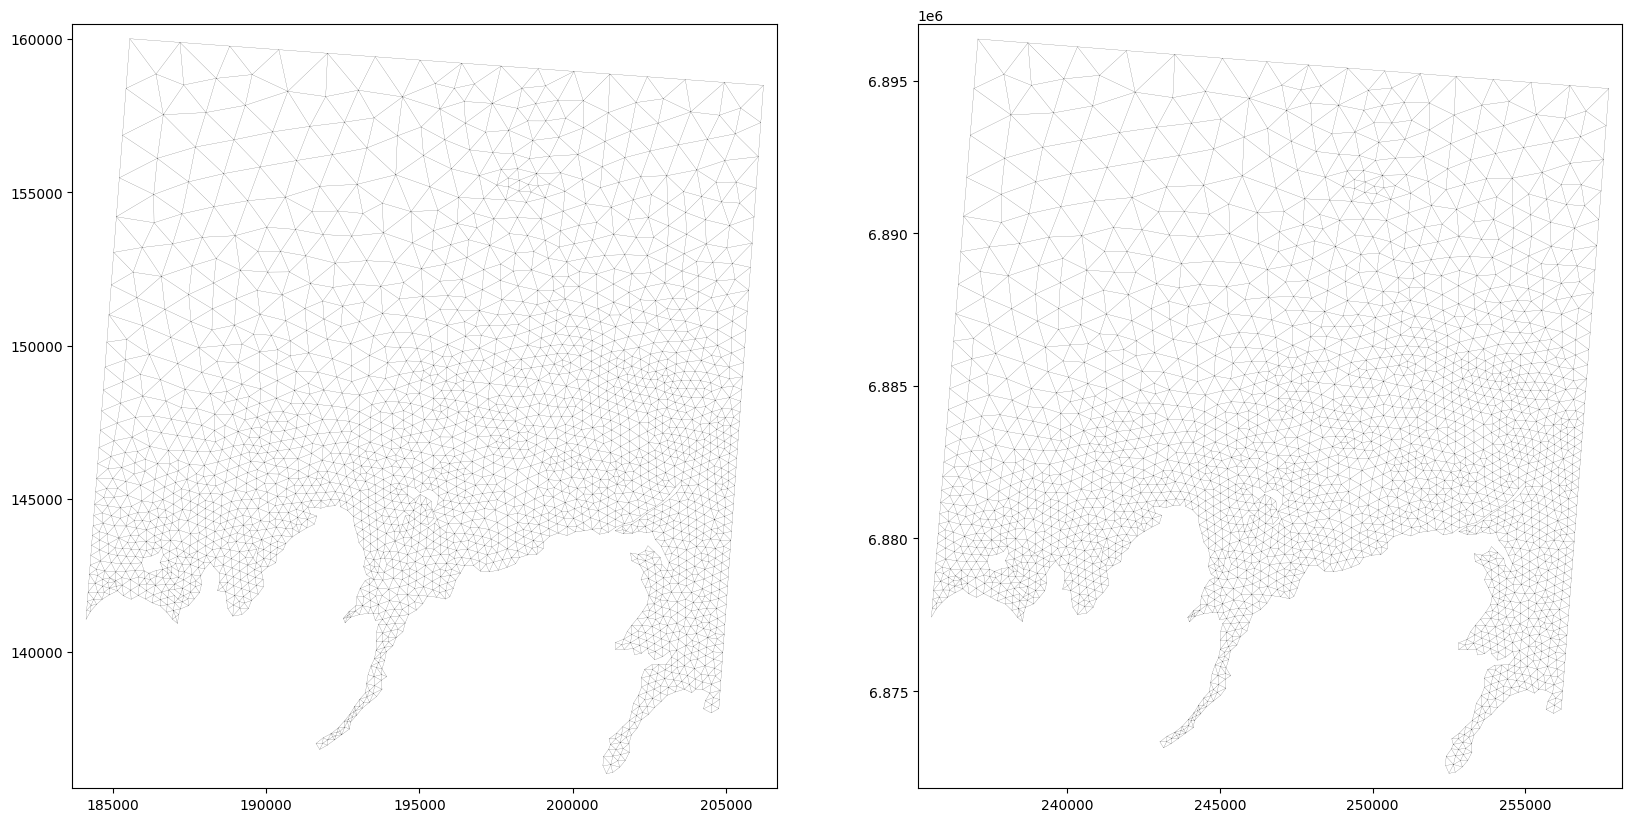

In [16]:
from postel.plot2d import plot2d_triangle_mesh
from data_manip.extraction.telemac_file import TelemacFile
from os import path, environ
import matplotlib.pyplot as plt

pdir = path.join(environ['HOMETEL'], 'examples', 'telemac2d', 'tide')

ori_file = path.join(pdir, 'f2d_tide-jmj_type.slf')
res_file = path.join(pdir, 'f2d_tide-jmj_type-lamb93.slf')

ori = TelemacFile(ori_file)
res = TelemacFile(res_file)

fig, ax = plt.subplots(1, 2, figsize=(20, 20))
ax[0].set_aspect('equal')
ax[1].set_aspect('equal')

# Plot mesh
plot2d_triangle_mesh(ax[0], ori.tri)
plot2d_triangle_mesh(ax[1], res.tri)

plt.show()
plt.close(fig)

ori.close()
res.close()

# Changing origin of coordinates

In [17]:
HOMETEL = %env HOMETEL
%cd -q {HOMETEL}/examples/python3/pretel

!run_telfile.py scan r2d_gouttedo.slf > init.log

!run_telfile.py alter r2d_gouttedo.slf r2d_gouttedo_new_ori.slf --orig 2000 6000 --force

!run_telfile.py scan r2d_gouttedo_new_ori.slf > modif.log

init_log = Path('init.log').read_text()
modif_log = Path('modif.log').read_text()
for delta in difflib.unified_diff(init_log, modif_log, n=0):
    print(delta.strip())



Interpreting command line options
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~





My work is done




---
+++
@@ -511,0 +512,3 @@
+2
+0
+0
@@ -514,0 +518,3 @@
+6
+0
+0
